 **PROBLEM DEFINITION**
### **a) Specifying the Question**


Identify anomalies in the dataset = fraud detection

# **b) Defining the metrics for success**
check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

## **c) Understanding the context**

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you’ll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.


# **d) Recording the Experimental Design**

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.
Identify anomalies in the dataset = fraud detection

### **e) Relevance of the data**

The data used for this project will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax)

[http://bit.ly/CarreFourSalesDataset].

 **Loading the data**

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("anomalize")
install.packages("anomalize")
install.packages("anomalize") 
library(anomalize)
library(lubridate)
library(tibbletime)

In [3]:
%%R
anom <-read.csv("anom.csv", header=TRUE,sep =",")

In [4]:
%%R

head(anom)

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


**Data Processing**

In [5]:
%%R
# Previewing the datatypes of our data
str(anom)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [6]:
%%R
# totalling sales on their common shared dates

anom_aggregate <- aggregate(anom$Sales,by=list(Date=anom$Date),FUN=sum)
head(anom_aggregate)

       Date        x
1  1/1/2019 4745.181
2 1/10/2019 3560.949
3 1/11/2019 2114.963
4 1/12/2019 5184.764
5 1/13/2019 2451.204
6 1/14/2019 3966.617


In [8]:
%%R
#getting a dataframe of the frequency table of Date
date_table<-data.frame(table(anom$Date))
head(date_table)

       Var1 Freq
1  1/1/2019   12
2 1/10/2019    9
3 1/11/2019    8
4 1/12/2019   11
5 1/13/2019   10
6 1/14/2019   13


In [9]:
%%R

library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks tibbletime::filter(), stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



In [11]:
%%R
# combining both dataframes
final_df<-merge(anom_aggregate,date_table,by.x= "Date", by.y="Var1")
final_df

        Date         x Freq
1   1/1/2019 4745.1810   12
2  1/10/2019 3560.9490    9
3  1/11/2019 2114.9625    8
4  1/12/2019 5184.7635   11
5  1/13/2019 2451.2040   10
6  1/14/2019 3966.6165   13
7  1/15/2019 5944.2600   13
8  1/16/2019 4289.0820   10
9  1/17/2019 3142.7550   11
10 1/18/2019 2780.4735    9
11 1/19/2019 4914.7245   16
12  1/2/2019 1945.5030    8
13 1/20/2019 3655.4490   10
14 1/21/2019 2392.0995    8
15 1/22/2019 1704.7695    7
16 1/23/2019 5994.1875   17
17 1/24/2019 5402.0505   13
18 1/25/2019 4700.3670   17
19 1/26/2019 4457.5125   17
20 1/27/2019 4635.8970   14
21 1/28/2019 4999.7115   14
22 1/29/2019 3516.5655   12
23  1/3/2019 2078.1285    8
24 1/30/2019 2558.2620    9
25 1/31/2019 5232.4965   14
26  1/4/2019 1623.6885    6
27  1/5/2019 3536.6835   12
28  1/6/2019 3614.2050    9
29  1/7/2019 2834.2440    9
30  1/8/2019 5293.7325   18
31  1/9/2019 3021.3435    8
32  2/1/2019 2444.5365    6
33 2/10/2019 3141.0225   11
34 2/11/2019 4542.1530    8
35 2/12/2019 2998.98

In [12]:
%%R

# Renaming columns
names(final_df)<-c("Date","Total.Sales","count")
head(final_df)

       Date Total.Sales count
1  1/1/2019    4745.181    12
2 1/10/2019    3560.949     9
3 1/11/2019    2114.963     8
4 1/12/2019    5184.764    11
5 1/13/2019    2451.204    10
6 1/14/2019    3966.617    13


In [13]:
%%R

#Changing date column to Date format
final_df$Date<-mdy(final_df$Date)
str(final_df)

'data.frame':	89 obs. of  3 variables:
 $ Date       : Date, format: "2019-01-01" "2019-01-10" ...
 $ Total.Sales: num  4745 3561 2115 5185 2451 ...
 $ count      : int  12 9 8 11 10 13 13 10 11 9 ...


In [14]:
%%R

final_df1 <- final_df %>% select(Date,count)
final_df1

         Date count
1  2019-01-01    12
2  2019-01-10     9
3  2019-01-11     8
4  2019-01-12    11
5  2019-01-13    10
6  2019-01-14    13
7  2019-01-15    13
8  2019-01-16    10
9  2019-01-17    11
10 2019-01-18     9
11 2019-01-19    16
12 2019-01-02     8
13 2019-01-20    10
14 2019-01-21     8
15 2019-01-22     7
16 2019-01-23    17
17 2019-01-24    13
18 2019-01-25    17
19 2019-01-26    17
20 2019-01-27    14
21 2019-01-28    14
22 2019-01-29    12
23 2019-01-03     8
24 2019-01-30     9
25 2019-01-31    14
26 2019-01-04     6
27 2019-01-05    12
28 2019-01-06     9
29 2019-01-07     9
30 2019-01-08    18
31 2019-01-09     8
32 2019-02-01     6
33 2019-02-10    11
34 2019-02-11     8
35 2019-02-12     8
36 2019-02-13     8
37 2019-02-14     8
38 2019-02-15    19
39 2019-02-16     8
40 2019-02-17    13
41 2019-02-18     7
42 2019-02-19     9
43 2019-02-02    14
44 2019-02-20    10
45 2019-02-21     6
46 2019-02-22    11
47 2019-02-23     8
48 2019-02-24     9
49 2019-02-25    16


In [15]:
%%R

# Convert df to a tibble
final_df1 <- as_tibble(final_df1)
class(final_df1)

[1] "tbl_df"     "tbl"        "data.frame"


In [16]:
%%R

df_anomalized <- final_df1 %>%
    time_decompose(count, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()
df_anomalized %>% glimpse()

R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 30 days

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Rows: 89
Columns: 11
$ Date          <date> 2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01…
$ count         <int> 12, 8, 8, 6, 12, 9, 9, 18, 8, 9, 8, 11, 10, 13, 13, 10, …
$ observed      <dbl> 12, 9, 8, 11, 10, 13, 13, 10, 11, 9, 16, 8, 10, 8, 7, 17…
$ season        <dbl> 0.883193879, 1.000751930, -2.026508631, 0.003578774, 0.0…
$ trend         <dbl> 10.03092, 10.16344, 10.29595, 10.42847, 10.56007, 10.691…
$ remainder     <dbl> 1.0858871, -2.1641886, -0.2694456, 0.5679495, -0.6329071…
$ remainder_l1  <dbl> -14.79896, -14.79896, -14.79896, -14.79896, -14.79896, -…
$ remainder_l2  <dbl> 15.41235, 15.41235, 15.41235, 15.41235, 15.41235, 15.412…
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "N…
$ recomposed_l1 <dbl> -3.884847, -3.634772, -6.529515, -4.366910, -4.166053, -…
$ recomposed_l2 <dbl> 26.32647, 26.57654, 23.68180, 25.84440, 26.04526, 25.615…


**Visualizing the anomalies**

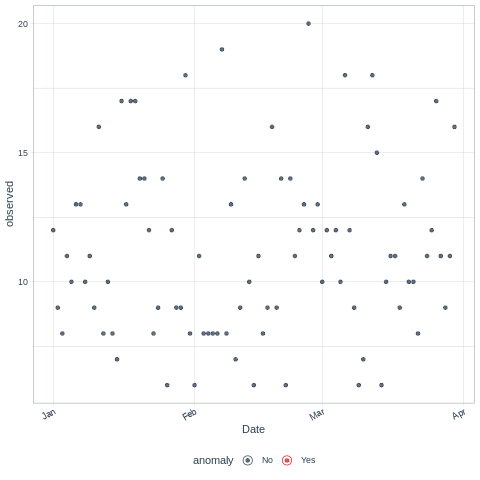

In [18]:
%%R
df_anomalized %>% plot_anomalies(ncol = 3, alpha_dots = 0.75)

**Adjusting Trend and Seasonality**

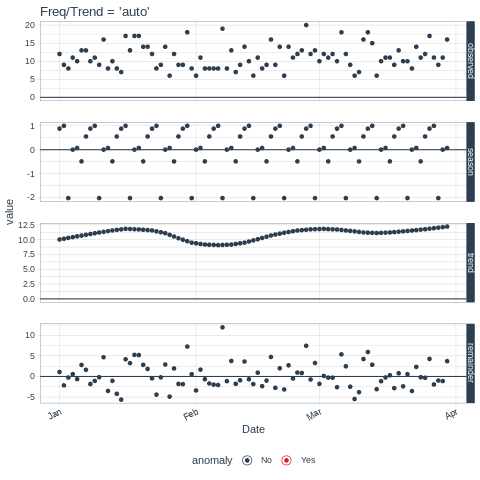

In [19]:
%%R

p1 <- df_anomalized %>%
    plot_anomaly_decomposition() +
    ggtitle("Freq/Trend = 'auto'")
p1

In [20]:
%%R

#When “auto” is used, a get_time_scale_template() is used to #determine the logical frequency and trend spans based on the scale #of the data. You can uncover the logic:
get_time_scale_template()

# A tibble: 8 × 3
  time_scale frequency trend   
  <chr>      <chr>     <chr>   
1 second     1 hour    12 hours
2 minute     1 day     14 days 
3 hour       1 day     1 month 
4 day        1 week    3 months
5 week       1 quarter 1 year  
6 month      1 year    5 years 
7 quarter    1 year    10 years
8 year       5 years   30 years


This implies that if the scale is 1 day (meaning the difference between each data point is 1 day), then the frequency will be 7 days (or 1 week) and the trend will be around 90 days (or 3 months). This logic can be easily adjusted in two ways: Local parameter adjustment & Global parameter adjustment.


**Adjusting Local Parameters**

In [21]:
%%R
p2 <- final_df1 %>%
    time_decompose(count,
                   frequency = "auto",
                   trend     = "2 weeks") %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("Trend = 2 Weeks (Local)")

R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 14 days



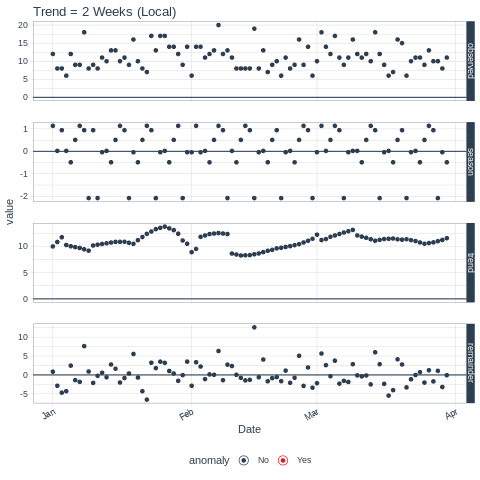

In [22]:
%%R

# Show plots
p1
p2

After adjusting the trend using local parameters we can see some anomalies being detected.

**Adjusting the Global Parameter**

In [23]:
%%R

#Adjusting globally by using set_time_scale_template() to update the #default template to one that we prefer. We’ll change the “3 month” #trend to “2 weeks” for time scale = “day”. Use time_scale_template() #to retrieve the time scale template that anomalize begins with, #mutate() the trend field in the desired location, and use #set_time_scale_template() to update the template in the global #options. We can retrieve the updated template using #get_time_scale_template() to verify the change has been executed #properly.
time_scale_template() %>%
    mutate(trend = ifelse(time_scale == "day", "2 weeks", trend)) %>%
    set_time_scale_template()
get_time_scale_template()



# A tibble: 8 × 3
  time_scale frequency trend   
  <chr>      <chr>     <chr>   
1 second     1 hour    12 hours
2 minute     1 day     14 days 
3 hour       1 day     1 month 
4 day        1 week    2 weeks 
5 week       1 quarter 1 year  
6 month      1 year    5 years 
7 quarter    1 year    10 years
8 year       5 years   30 years


R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 14 days



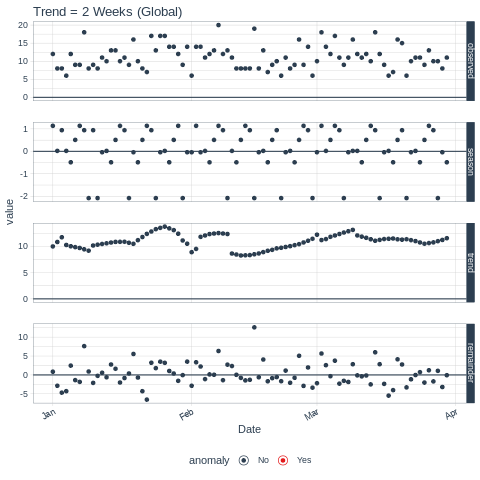

In [24]:
%%R

#plotting to see changes
p3 <- final_df1 %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("Trend = 2 Weeks (Global)")
p3

In [25]:
%%R

#Let’s reset the time scale template defaults back to the original #defaults.
time_scale_template() %>%
    set_time_scale_template()
# Verify the change
get_time_scale_template()

# A tibble: 8 × 3
  time_scale frequency trend   
  <chr>      <chr>     <chr>   
1 second     1 hour    12 hours
2 minute     1 day     14 days 
3 hour       1 day     1 month 
4 day        1 week    3 months
5 week       1 quarter 1 year  
6 month      1 year    5 years 
7 quarter    1 year    10 years
8 year       5 years   30 years


**Extracting the Anomalous Data Points**

In [ ]:
%%R

#Now, we can extract the actual datapoints which are anomalies. For #that, the following code can be run.
final_df1 %>% 
  time_decompose(count) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  filter(anomaly == 'Yes')

#### **Adjusting Alpha and Max Anoms**
* **Alpha**

R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 30 days



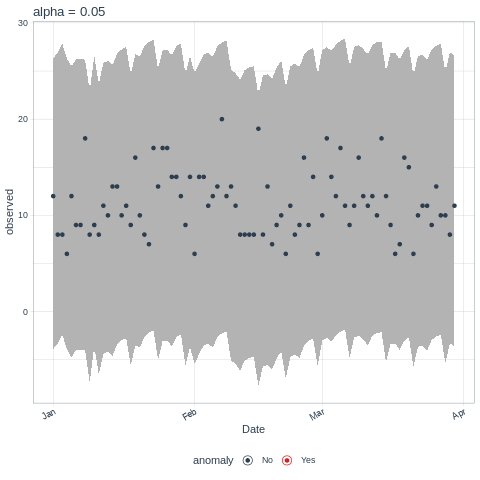

In [30]:
%%R

#We can adjust alpha, which is set to 0.05 by default. By default, #the bands just cover the outside of the range.
p4 <- final_df1 %>%
    time_decompose(count) %>%
    anomalize(remainder, alpha = 0.05, max_anoms = 0.2) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("alpha = 0.05")

  
p4


#> frequency = 7 days
#> trend = 30 days


R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 30 days



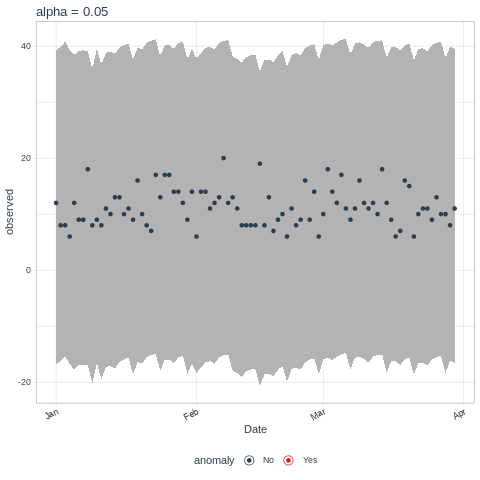

In [31]:
%%R

p5 <- final_df1 %>%
    time_decompose(count) %>%
    anomalize(remainder, alpha = 0.025, max_anoms = 0.2) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("alpha = 0.05")
#> frequency = 7 days
#> trend = 30 days
p5


**Max Anoms**

R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: trend = 30 days

R[write to console]: Converting from tbl_df to tbl_time.
Auto-index message: index = Date

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: frequency = 7 days

R[write to console]: Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

R[write to console]: Note: Index not ordered. tibbletime assumes ind

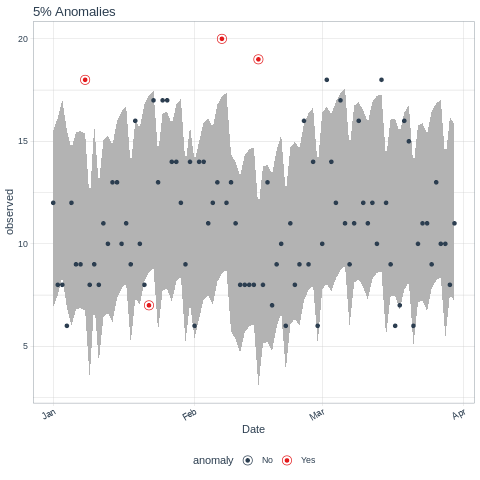

In [32]:
%%R

#The max_anoms parameter is used to control the maximum percentage of #data that can be an anomaly. Let’s adjust alpha = 0.3 so pretty much #anything is an outlier. Now let’s try a comparison between max_anoms #= 0.2 (20% anomalies allowed) and max_anoms = 0.05 (5% anomalies #allowed).
p6 <- final_df1 %>%
    time_decompose(count) %>%
    anomalize(remainder, alpha = 0.3, max_anoms = 0.2) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("20% Anomalies")
#> frequency = 7 days
#> trend = 30 days
p7 <- final_df1 %>%
    time_decompose(count) %>%
    anomalize(remainder, alpha = 0.3, max_anoms = 0.05) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("5% Anomalies")
#> frequency = 7 days
#> trend = 30 days
p6
p7


* Adjusting the max anoms result in presence of anomalies in our data.

In [33]:
#### Using the ‘timetk’ package
#Interactive Anomaly Visualization

#Here, timetk’s plot_anomaly_diagnostics() function makes it possible #to tweak some of the parameters on the fly.

%%R
final_df1 %>% timetk::plot_anomaly_diagnostics(Date,count, .facet_ncol = 2)

R[write to console]: frequency = 7 observations per 1 week

R[write to console]: trend = 31 observations per 1 month



**Interactive Anomaly Detection**

In [34]:
%%R


#To find the exact data points that are anomalies, we use #tk_anomaly_diagnostics() function.
final_df1 %>% timetk::tk_anomaly_diagnostics(Date, count) %>% filter(anomaly=='Yes')

R[write to console]: frequency = 7 observations per 1 week

R[write to console]: trend = 31 observations per 1 month



# A tibble: 0 × 11
# … with 11 variables: Date <date>, observed <dbl>, season <dbl>, trend <dbl>,
#   remainder <dbl>, seasadj <dbl>, remainder_l1 <dbl>, remainder_l2 <dbl>,
#   anomaly <chr>, recomposed_l1 <dbl>, recomposed_l2 <dbl>


**CONCLUSION**

 From our observation we can see that there were no anomalies detected within our data.